In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import time
import pandas as pd
import plotly.express as px
import plotly.io as pio
import scipy.io.wavfile as wav
pio.renderers.default = "notebook"

In [2]:
from audio.signal import *
from audio.const import *
from audio.sound import *
from audio.control import *
from audio.filter import *
from audio.sampler import *

Mostrar ondas copiandolas para que no se altere el frame.

In [3]:

from copy import deepcopy
def showOsc(osc, time, chunks=False):
    _osc = deepcopy(osc)
    signal = np.zeros(0)
    _chunks = int(time*(SRATE+CHUNK)/CHUNK)
    if chunks:
        _chunks = time
    for i in range(_chunks):
        signal = np.concatenate((signal, _osc.next()))
    plt.plot(signal)

In [4]:
'''REPRODUCTOR'''
input = None

def callback(outdata, frames, time, status):
    global input
    # print('entro')
    if input is not None:
        bloque = input.next()
        # convertimos formato (CHUNK,) a (CHUNK,1) para que adecuarlo a sounddevice
        outdata[:] = bloque.reshape(-1, 1)
    else:
        # si no hay datos, reproducimos silencio
        outdata[:] = np.zeros((CHUNK, 1))


# stream de salida con callBack
stream = sd.OutputStream(samplerate=SRATE, channels=2, callback=callback, blocksize=CHUNK)
stream.start()

In [5]:
def play(osc:Signal, add=False):
    global input 
    if add is False or input is None:
        input = osc # sustituye lo que estaba sonando antes
    else:
        input += osc # añade a lo que estaba sonando antes
        
def stop():
    global input 
    input = None
    
def playFor(osc:Signal, secs=5, add=False):
    play(osc)
    time.sleep(secs)
    stop()   
    
def live(osc:Signal, secs=2):
    ''' Devuelve los chunks concatenados como si se hubieran sacado live'''
    wave = np.array([])
    for i in range(int(secs*SRATE/CHUNK)):
        chunk = osc.next(CHUNK)
        wave = np.concatenate((wave, chunk))
    return wave 
    
def show(osc:Signal, secs=.5):
    plt.plot(osc.next(SRATE*secs))
    
def show2(osc:Signal, secs=.5):
    df = pd.DataFrame({"amp": osc.next(SRATE*secs)})
    df["secs"] = df.index / SRATE
    wave = px.line(df, y="amp", title="Waveform")
    wave.show()
    
def show_live(osc:Signal, secs=.5):
    wave = live(osc, secs)
    plt.plot(wave)
    
def show2_live(osc:Signal, secs=.5):
    wave = live(osc, secs)
    df = pd.DataFrame({"amp": wave})
    df["secs"] = df.index / SRATE
    wave = px.line(df, y="amp", title="Waveform")
    wave.show()

    

In [6]:
def toWav(osc:Signal, filename="output.wav", secs=5):
    wave = osc.next(SRATE*secs)
    wave = (wave * 32767).astype(np.int16)  # Convertir a formato PCM 16 bits
    wav.write(filename, SRATE, wave)
    
def toWav_live(osc:Signal, filename="output.wav", secs=5):
    wave = np.array([])
    for i in range(int(secs*SRATE/CHUNK)):
        chunk = osc.next(CHUNK)
        wave = np.concatenate((wave, chunk))
    wave = (wave * 32767).astype(np.int16)  # Convertir a formato PCM 16 bits
    wav.write(filename, SRATE, wave)
        
    

Para cargar librerias y reproducir sonido

In [7]:
raise Exception("Para de ejecutar!!")

Exception: Para de ejecutar!!

In [ ]:
playFor(Sine(440), 1)

In [ ]:
playFor(Noise(), 1)

uso de los wavetables

In [ ]:
s2 = Sine(1, phase=1).next(SRATE)[-1]
print(s2)

0.8414002521924576


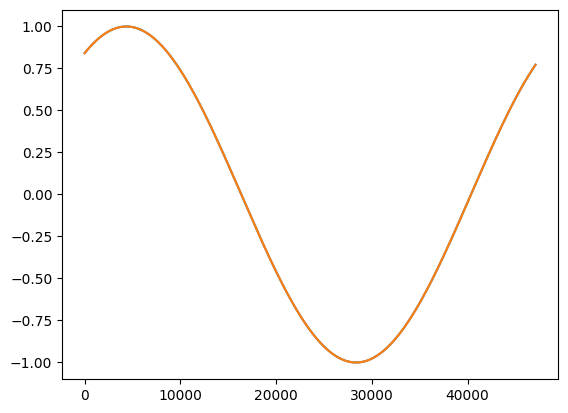

In [10]:
s2 = Sine(1, phase=1)
s = Sine(1).next(SRATE)
wt = WT(s, freq=1, phase=1)
# toWav(wt, 'sine_table.wav', secs=5)
show_live(s2, 1)
show_live(wt, 1)



In [ ]:
playFor(wt, 3)
playFor(Sine(440), 3)